In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from datetime import datetime, timedelta
import sys
sys.path.append("/Users/mprange/PycharmProjects/flight_phase_seperation/")


from typhon.plots import worldmap
import FlightPhaseTools as fpt
from ResearchFlight import ResearchFlight
from ResearchFlightSegment import ResearchFlightSegment

# Load data into xarray datasets.

In [2]:
bahamas = xr.open_dataset('/Users/mprange/Desktop/halo_unified/unified/bahamas_20200126_v0.4.nc')
dropsondes = xr.open_dataset('/Users/mprange/Desktop/halo_unified/unified/dropsondes_20200126_v0.4.nc')

# Determine the timestamps of the different flight phases using the FlightPhaseTools module.

In [3]:
takeoff = 0
touchdown = len(bahamas['time']) - 1
min_roll_b4_supercurtain = fpt.min_timestamp_ind(bahamas, 'roll', 
                                                 slice('2020-01-26T12:00:00', '2020-01-26T12:15:00'), 
                                                order=1000)
enter_supercurtain = fpt.find_first_value_after_ts_ind(
    bahamas, quantity='roll', timestamp_ind=min_roll_b4_supercurtain, apr_value=0., margin=0.1)
max_roll_after_supercurtain = fpt.max_timestamp_ind(bahamas, 'heading', 
                                               slice('2020-01-26T12:15:00', '2020-01-26T12:22:00'),
                                               order=100)
exit_supercurtain = fpt.find_first_value_before_ts_ind(
    bahamas, quantity='roll', timestamp_ind=max_roll_after_supercurtain, apr_value=0., margin=0.1)
enter_c1 = fpt.ds_timestamp_ind(bahamas, dropsondes, 0) # Why start at 17° heading? Why is there a 20° step?
exit_c1 = fpt.ds_timestamp_ind(bahamas, dropsondes, 11)
enter_c2 = fpt.ds_timestamp_ind(bahamas, dropsondes, 12) # Why is there a 150° pause between sonde 12 and 13?
exit_c2 = fpt.ds_timestamp_ind(bahamas, dropsondes, 21) # Two dropsondes failed or are missing. One noted in log.
enter_c3 = fpt.ds_timestamp_ind(bahamas, dropsondes, 22)
exit_c3 = fpt.ds_timestamp_ind(bahamas, dropsondes, 32)
enter_leg1 = fpt.find_first_value_after_ts_ind(bahamas, quantity='roll', timestamp_ind=exit_c3, 
                                               apr_value=0., margin=0.1)
min_heading_after_leg1 = fpt.min_timestamp_ind(bahamas, 'heading', 
                                               slice('2020-01-26T16:00:00', '2020-01-26T16:15:00'),
                                               order=1000)
exit_leg1 = fpt.find_first_value_before_ts_ind(bahamas, quantity='roll', timestamp_ind=min_heading_after_leg1, 
                                               apr_value=0., margin=0.1)
max_roll_after_leg1 = fpt.max_timestamp_ind(bahamas, 'roll', 
                                               slice(bahamas['time'][exit_leg1], '2020-01-26T16:15:00'),
                                               order=1000)
enter_leg2 = fpt.find_first_value_after_ts_ind(bahamas, quantity='roll', timestamp_ind=max_roll_after_leg1, 
                                               apr_value=0., margin=0.1)
min_heading_after_leg2 = fpt.min_timestamp_ind(bahamas, 'heading', 
                                               slice('2020-01-26T16:30:00', '2020-01-26T16:45:00'),
                                               order=1000)
exit_leg2 = fpt.find_first_value_before_ts_ind(bahamas, quantity='roll', timestamp_ind=min_heading_after_leg2, 
                                               apr_value=0., margin=0.1)
max_roll_after_leg2 = fpt.max_timestamp_ind(bahamas, 'roll', 
                                            slice(bahamas['time'][exit_leg2], '2020-01-26T16:45:00'),
                                            order=1000)
enter_leg3 = fpt.find_first_value_after_ts_ind(bahamas, quantity='roll', timestamp_ind=max_roll_after_leg2, 
                                               apr_value=0., margin=0.1)
min_heading_after_leg3 = fpt.min_timestamp_ind(bahamas, 'heading', 
                                               slice('2020-01-26T16:45:00', '2020-01-26T17:00:00'),
                                               order=1000)
exit_leg3 = fpt.find_first_value_before_ts_ind(bahamas, quantity='roll', timestamp_ind=min_heading_after_leg3, 
                                               apr_value=0., margin=0.1)
max_roll_after_leg3 = fpt.max_timestamp_ind(bahamas, 'roll', 
                                            slice(bahamas['time'][exit_leg3], '2020-01-26T17:00:00'),
                                            order=1000)
enter_leg4 = fpt.find_first_value_after_ts_ind(bahamas, quantity='roll', timestamp_ind=max_roll_after_leg3, 
                                               apr_value=0., margin=0.1)
min_heading_after_leg4 = fpt.min_timestamp_ind(bahamas, 'heading', 
                                               slice('2020-01-26T17:00:00', '2020-01-26T17:20:00'),
                                               order=1000)
exit_leg4 = fpt.find_first_value_before_ts_ind(bahamas, quantity='roll', timestamp_ind=min_heading_after_leg4, 
                                               apr_value=0., margin=0.1)
enter_c4 = fpt.ds_timestamp_ind(bahamas, dropsondes, 36)
exit_c4 = fpt.ds_timestamp_ind(bahamas, dropsondes, 47)
enter_c5 = fpt.ds_timestamp_ind(bahamas, dropsondes, 48)
exit_c5 = fpt.ds_timestamp_ind(bahamas, dropsondes, 58)
enter_traffic = fpt.max_timestamp_ind(
    bahamas, 'roll', slice(bahamas['time'][exit_c5], '2020-01-26T19:45:00'), order=1000)
exit_traffic = fpt.max_timestamp_ind(
    bahamas, 'roll', slice(bahamas['time'][enter_traffic], '2020-01-26T19:55:00'), order=1000)
enter_c6 = fpt.ds_timestamp_ind(bahamas, dropsondes, 59)
exit_c6 = fpt.ds_timestamp_ind(bahamas, dropsondes, 70)
enter_lidar_cal = fpt.find_first_value_after_ts_ind(bahamas, 'altitude', exit_c6, 5090., 1.)
exit_lidar_cal = fpt.find_first_value_after_ts_ind(bahamas, 'altitude', enter_lidar_cal, 5089.5, 1.)

ts_ind_list = [enter_supercurtain, 
               exit_supercurtain, enter_c1, exit_c1, 
               enter_c2, exit_c2, enter_c3, exit_c3, 
               enter_leg1, exit_leg1, enter_leg2, exit_leg2, 
               enter_leg3, exit_leg3, enter_leg4, exit_leg4, 
               enter_c4, exit_c4, enter_c5, exit_c5, enter_traffic,
               exit_traffic, enter_c6, exit_c6, enter_lidar_cal, 
               exit_lidar_cal]
label_list = [
              "enter_supercurtain", "exit_supercurtain",
              "enter_c1", "exit_c1","enter_c2", "exit_c2", 
              "enter_c3", "exit_c3", "enter_leg1", "exit_leg1", 
              "enter_leg2", "exit_leg2","enter_leg3", "exit_leg3", 
              "enter_leg4", "exit_leg4", "enter_c4", "exit_c4",
              "enter_c5", "exit_c5", "enter_traffic", "exit_traffic", 
              "enter_c6", "exit_c6", "enter_lidar_cal", 
              "exit_lidar_cal"]

# Plot basic timeseries of bahamas data with markers for determined timestamps to manually evaluate the validity of the timestamps.

/Users/mprange/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


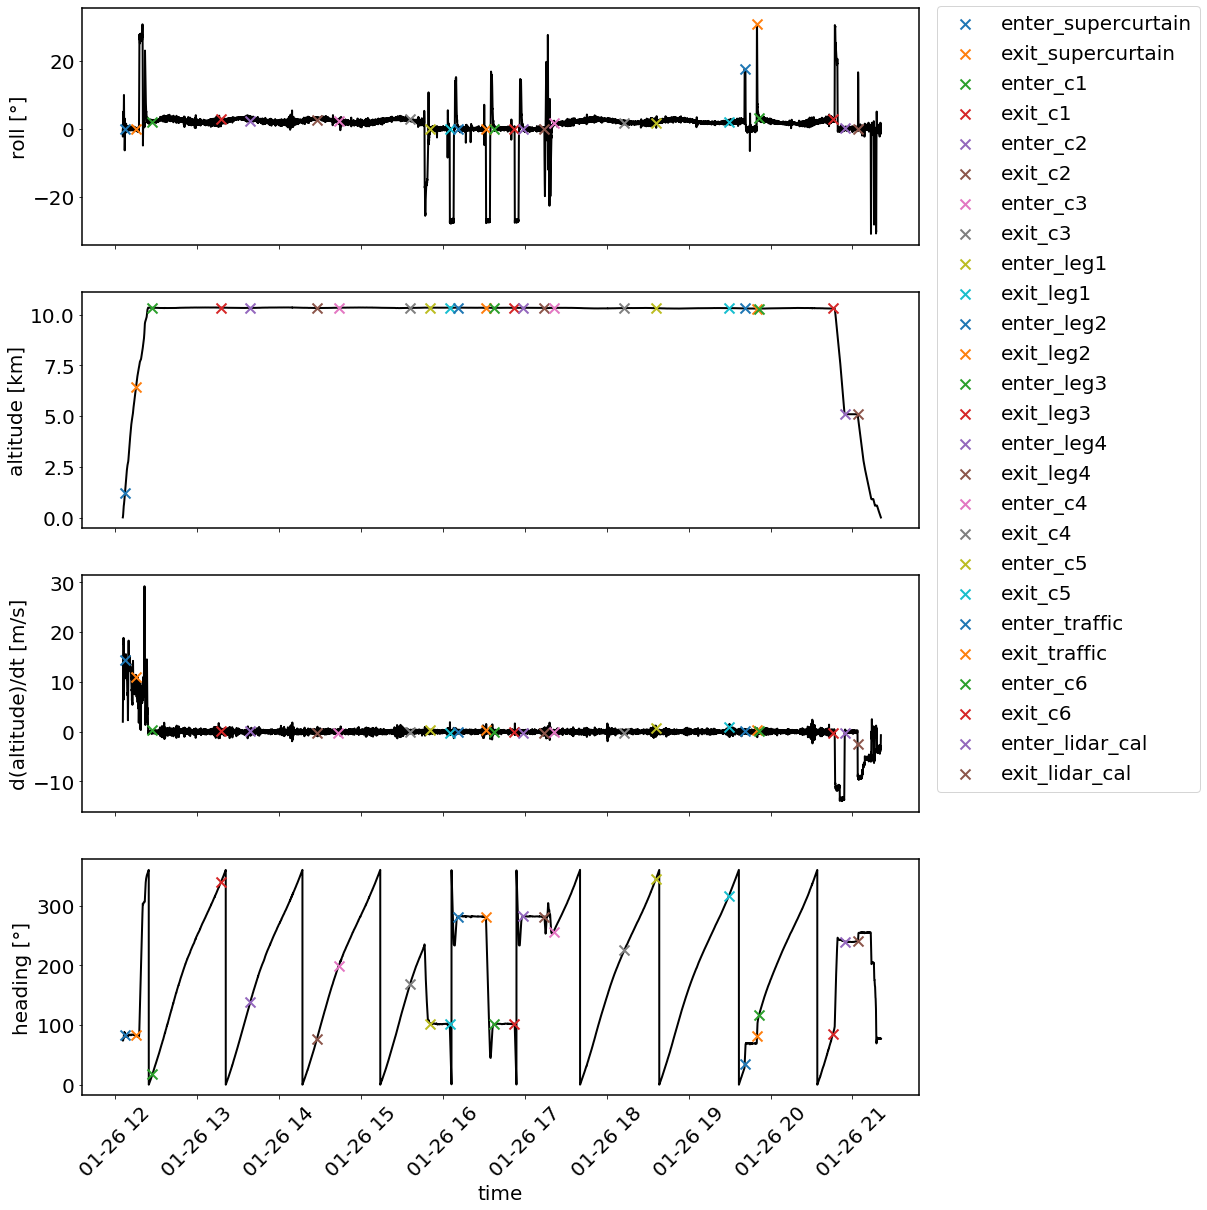

In [4]:
fig, ax = fpt.plot_bahamas_timeseries(bahamas, ts_ind_list, label_list)

# Draw a map of the flight track and scatter in some of the found timestamps

In [ ]:
worldmap(bahamas['lat'], bahamas['lon'])
worldmap(bahamas['lat'][enter_supercurtain], bahamas['lon'][enter_supercurtain], s=50, color='lightgreen')
worldmap(bahamas['lat'][exit_supercurtain], bahamas['lon'][exit_supercurtain], s=50, color='orange')
worldmap(bahamas['lat'][enter_c1], bahamas['lon'][enter_c1], s=50, color='green')
worldmap(bahamas['lat'][exit_c1], bahamas['lon'][exit_c1], s=50, color='red')
worldmap(bahamas['lat'][enter_c2], bahamas['lon'][enter_c2], s=50, color='green')
worldmap(bahamas['lat'][exit_c2], bahamas['lon'][exit_c2], s=50, color='red')
worldmap(bahamas['lat'][enter_c3], bahamas['lon'][enter_c3], s=50, color='green')
worldmap(bahamas['lat'][exit_c3], bahamas['lon'][exit_c3], s=50, color='red')

# Create xarray datasets of the determined flight phase timestamps and store them as NetCDF files.

In [ ]:
timestamps = fpt.get_unixtime(bahamas['time'][ts_ind_list].values.reshape((int(len(ts_ind_list) / 2), 2)))
flight_phases = np.array(['super_curtain', 'c1', 'c2', 'c3',
                          'leg1', 'leg2', 'leg3', 'leg4', 'c4', 
                          'c5', 'c6', 'lidar_calibration'])
flight_phase_ds = xr.Dataset(
    {
        "flight_phase": xr.DataArray(flight_phases, dims=("flight_phase",)),
        "start_end": xr.DataArray(["phase_start", "phase_end"], dims=("start_end",)),
        "timestamp": xr.DataArray(timestamps, dims=("flight_phase", "start_end")),
    }, 
    attrs={
        'mission': bahamas.attrs['mission'],
        'flight_number': bahamas.attrs['flight_number'],
        'flight_date': str(pd.to_datetime(bahamas['time'][0].values).date()), 
        'takeoff': str(bahamas['time'][takeoff].values),
        'touchdown': str(bahamas['time'][touchdown].values),
        'contact': 'marc.prange@uni-hamburg.de',
        })
flight_phase_ds

In [ ]:
flight_phase_ds.to_netcdf(
    f'flight_phase_files/RF_{flight_phase_ds.flight_number}_' \
    f'{flight_phase_ds.flight_date}_flight_phase_timestamps_v2.nc')

# Create a ResearchFlight object to represent the flight meta data.

In [5]:
RF04 = ResearchFlight(name=f"RF{bahamas.attrs['flight_number']}",
                      mission=bahamas.attrs['mission'],
                      flight_id='HALO-0126',
                      contacts=[
                          {
                              'name': 'Marc Prange', 
                              'email': 'marc.prange@uni-hamburg.de',
                              'tags': ['dataset creator'],
                          },
                          {
                              'name': 'Manfred Wendisch',
                              'email': 'm.wendisch@uni-leipzig.de',
                              'tags': ['flight PI']
                          }
                      ],
                      date=fpt.dt64_to_dt(bahamas['time'][takeoff].values).date(),
                      takeoff=fpt.dt64_to_dt(bahamas['time'][takeoff].values),
                      landing=fpt.dt64_to_dt(bahamas['time'][touchdown].values),
                      events=[],
                      remarks=['Super curtain with Twin Otter and ATR after takeoff.',
                               'Four coordinated straight legs over Meteor.',
                               'Cirrus clouds in 14-17 km present for almost full flight.'],
)

In [ ]:
RF04.to_dictionary()

# Store the flight phase information in ResearchFlightSegment objects.

In [6]:
super_curtain = ResearchFlightSegment(kind='straight_leg',
                                      name='super_curtain',
                                      start=fpt.dt64_to_dt(bahamas["time"][enter_supercurtain].values),
                                      end=fpt.dt64_to_dt(bahamas['time'][exit_supercurtain].values))
circle1 = ResearchFlightSegment(kind='circle',
                                name='c1',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c1].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c1].values)
                               )
circle_break1 = ResearchFlightSegment(kind='circle_break',
                                      name='cb1to2',
                                      start=fpt.dt64_to_dt(bahamas["time"][exit_c1].values),
                                      end=fpt.dt64_to_dt(bahamas['time'][enter_c2].values)
                                     )
circle2 = ResearchFlightSegment(kind='circle',
                                name='c2',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c2].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c2].values)
                               )
circle_break2 = ResearchFlightSegment(kind='circle_break',
                                      name='cb2to3',
                                      start=fpt.dt64_to_dt(bahamas["time"][exit_c2].values),
                                      end=fpt.dt64_to_dt(bahamas['time'][enter_c3].values)
                                     )
circle3 = ResearchFlightSegment(kind='circle',
                                name='c3',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c3].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c3].values)
                               )
leg1 = ResearchFlightSegment(kind='straight_leg',
                             name='leg1_over_Meteor',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg1].values),
                             end=fpt.dt64_to_dt(bahamas['time'][exit_leg1].values))
leg2 = ResearchFlightSegment(kind='straight_leg',
                             name='leg2_over_Meteor',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg2].values),
                             end=fpt.dt64_to_dt(bahamas['time'][exit_leg2].values))
leg3 = ResearchFlightSegment(kind='straight_leg',
                             name='leg3_over_Meteor',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg3].values),
                             end=fpt.dt64_to_dt(bahamas['time'][exit_leg3].values))
leg4 = ResearchFlightSegment(kind='straight_leg',
                             name='leg4_over_Meteor',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg4].values),
                             end=fpt.dt64_to_dt(bahamas['time'][exit_leg4].values))
radar_cal = ResearchFlightSegment(kind='radar_calibration_wiggle',
                                  name='radar_cal_wiggle',
                                  start=fpt.dt64_to_dt(bahamas["time"][exit_leg4].values),
                                  end=fpt.dt64_to_dt(bahamas['time'][enter_c4].values))
circle4 = ResearchFlightSegment(kind='circle',
                                name='c4',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c4].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c4].values)
                               )
circle_break3 = ResearchFlightSegment(kind='circle_break',
                                      name='cb4to5',
                                      start=fpt.dt64_to_dt(bahamas["time"][exit_c4].values),
                                      end=fpt.dt64_to_dt(bahamas['time'][enter_c5].values)
                                     )
circle5 = ResearchFlightSegment(kind='circle',
                                name='c5',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c5].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c5].values)
                               )
circle_break4 = ResearchFlightSegment(kind='circle_break',
                                      name='cb5to6',
                                      start=fpt.dt64_to_dt(bahamas["time"][exit_c5].values),
                                      end=fpt.dt64_to_dt(bahamas['time'][enter_traffic].values)
                                     )
circle6 = ResearchFlightSegment(kind='circle',
                                name='c6',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c6].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c6].values)
                               )
lidar_cal = ResearchFlightSegment(kind='lidar_calibration',
                                  name='lidar_cal',
                                  start=fpt.dt64_to_dt(bahamas["time"][enter_lidar_cal].values),
                                  end=fpt.dt64_to_dt(bahamas['time'][exit_lidar_cal].values)
                                 )

# Append the flight segments to the ResearchFlight object and save the object content to a .yaml file.

In [7]:
RF04.append_segments([super_curtain, circle1, circle_break1, circle2, circle_break2, circle3, 
                      leg1, leg2, leg3, leg4, radar_cal, circle4, circle_break3, 
                      circle5, circle_break4, circle6, lidar_cal])

In [8]:
RF04.to_yaml(filename='/Users/mprange/PycharmProjects/flight_phase_seperation/flight_phase_files/RF04_info.yaml')